### K-nearest Neighbors Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('DATA\Mobile_Dataset.csv')

In [36]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Heatmap of the correlation between the attribute of mobile phone 

<AxesSubplot:>

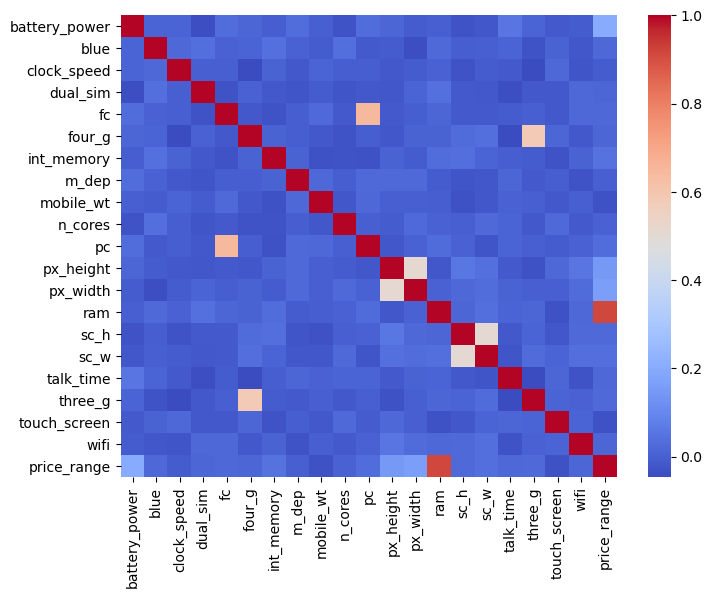

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm')

### Train and Test Split and Scaling Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('price_range',axis=1)
y = df['price_range']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# when using KNN always need to scale the data
# because it is using distance metrics to build the model
scaler = StandardScaler()

In [32]:
scaled_X_train = scaler.fit_transform(X_train)

# not fitting the test data, just transforming it to prevent any data leakage
scaled_X_test = scaler.transform(X_test)

### KNN Classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=18)

In [13]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

#### KNN - Model Evaluation

In [14]:
y_pred = knn_model.predict(scaled_X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
accuracy_score(y_test, y_pred)

0.6225

In [17]:
confusion_matrix(y_test,y_pred)

array([[71, 21,  2,  0],
       [25, 57, 19,  1],
       [ 8, 40, 53, 19],
       [ 0,  3, 13, 68]], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        94
           1       0.47      0.56      0.51       102
           2       0.61      0.44      0.51       120
           3       0.77      0.81      0.79        84

    accuracy                           0.62       400
   macro avg       0.63      0.64      0.63       400
weighted avg       0.63      0.62      0.62       400



#### Full Cross Validation Grid Search for K Value

In [19]:
scaler = StandardScaler()

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [22]:
# Highly recommend string code matches variable name!
operations = [('scaler',scaler),('knn',knn)]

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
pipe = Pipeline(operations)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
k_values = list(range(1,20))

In [27]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [28]:
param_grid = {'knn__n_neighbors': k_values}

In [29]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [33]:
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [31]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}